In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

import argparse

# データセットの読み込みと前処理

In [2]:
# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') # float32型に変換
x_train /= 255                      # 0から1.0の範囲に変換

# テストデータ
# (10000, 28, 28)の3階テンソルを(10000, 28, 28, 1)の4階テンソルに変換
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test.astype('float32') # float32型に変換
x_test /= 255                     # 0から1.0の範囲に変換

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# ハイパーパラメータの設定
parser = argparse.ArgumentParser()
parser.add_argument('--epochs', type=int, default=500)
parser.add_argument('--batch_size', type=int, default=64)
parser.add_argument('--patience', type=int, default=20) # earlystoppingの監視対象回数
parser.add_argument('--lr', type=int, default=0.001) # 学習率
parser.add_argument('--validation_split', type=float, default=0.2)
opt = parser.parse_args(args=[])
print(opt)

Namespace(batch_size=64, epochs=500, lr=0.001, patience=20, validation_split=0.2)


# モデルの構築

In [4]:
model = Sequential()                 # Sequentialオブジェクトの生成

# 畳み込み層
model.add(
    Conv2D(filters=32,               # フィルターの数は32
           kernel_size=(3, 3),       # 3×3のフィルターを使用
           padding='same',           # ゼロパディングを行う
           input_shape=(28, 28, 1),  # 入力データの形状                     
           activation='relu'         # 活性化関数はReLU
           ))

# Flatten: (28, 28, 32)の出力を(25088,)にフラット化
model.add(Flatten())
# ドロップアウト
model.add(Dropout(0.5))

# 出力層
model.add(Dense(10,                  # 出力層のニューロン数は10
                activation='softmax' # 活性化関数はsoftmax
               ))

# オブジェクトのコンパイル
model.compile(
    loss='sparse_categorical_crossentropy', # スパース行列対応クロスエントロピー誤差
    optimizer=SGD(lr=opt.lr),           # 最適化アルゴリズムはSGD
    metrics=['accuracy'])            # 学習評価として正解率を指定

model.summary()                      # サマリを表示

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# 学習

In [5]:
# 早期終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss', # 監視対象は損失
    patience=opt.patience,         # 監視する回数
    verbose=1           # 早期終了をログとして出力
)

# 学習を行って結果を出力
history = model.fit(
    x_train,           # 訓練データ
    y_train,           # 正解ラベル
    epochs=opt.epochs, # 学習を繰り返す回数
    batch_size=opt.batch_size,  # ミニバッチのサイズ
    verbose=1,              # 学習の進捗状況を出力する
    validation_split= opt.validation_split,  # 検証データとして使用する割合
    shuffle=True, # 検証データを抽出する際にシャッフルする
    callbacks=[early_stopping]# コールバックはリストで指定する
    )
# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの損失を出力
print('Test loss:', score[0])
# テストデータの精度を出力
print('Test accuracy:', score[1])

Epoch 1/500
750/750 [==============================] - 16s 7ms/step - loss: 1.4546 - accuracy: 0.5681 - val_loss: 0.9247 - val_accuracy: 0.6998
Epoch 2/500
750/750 [==============================] - 5s 6ms/step - loss: 0.8389 - accuracy: 0.7123 - val_loss: 0.7242 - val_accuracy: 0.7517
Epoch 3/500
750/750 [==============================] - 5s 6ms/step - loss: 0.7211 - accuracy: 0.7506 - val_loss: 0.6497 - val_accuracy: 0.7785
Epoch 4/500
750/750 [==============================] - 5s 6ms/step - loss: 0.6633 - accuracy: 0.7710 - val_loss: 0.6047 - val_accuracy: 0.7939
Epoch 5/500
750/750 [==============================] - 5s 6ms/step - loss: 0.6235 - accuracy: 0.7855 - val_loss: 0.5731 - val_accuracy: 0.8012
Epoch 6/500
750/750 [==============================] - 5s 6ms/step - loss: 0.5981 - accuracy: 0.7920 - val_loss: 0.5548 - val_accuracy: 0.8079
Epoch 7/500
750/750 [==============================] - 5s 6ms/step - loss: 0.5760 - accuracy: 0.8003 - val_loss: 0.5400 - val_accuracy: 0.812

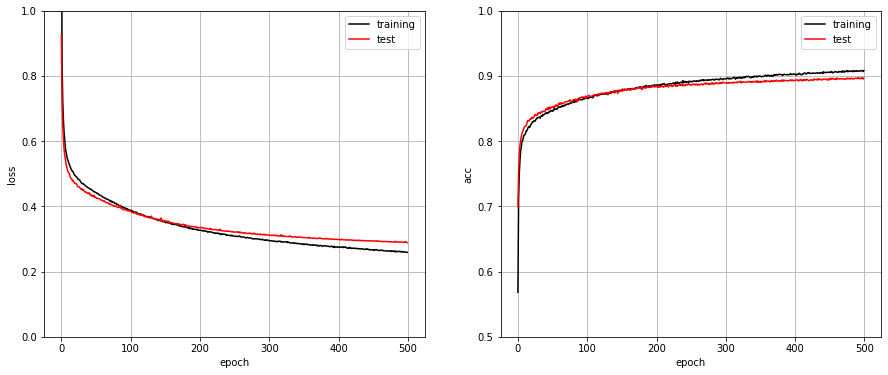

In [6]:
# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training',  color='black') # 訓練データの損失(誤り率)をプロット
plt.plot(history.history['val_loss'], label='test',  color='red') # テストデータの損失(誤り率)をプロット
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(history.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_accuracy'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()